In [51]:
%matplotlib inline

In [136]:
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
X1	Сорт	FLOAT
X2	Вологість	FLOAT
X3	Азот	FLOAT
X4	Фосфор	FLOAT
X5	Площа	FLOAT
X6	Пора року	INT
X7	К-сть зерен на одиницю площі	FLOAT
X8	Хмарність	INT
y1	Урожайність	FLOAT
y2	Ціна	FLOAT

In [137]:
dataset = read_csv('data.csv',',')
dataset.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [138]:
dataset.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


In [139]:
dataset = dataset.drop(['X1','X4'], axis=1)
dataset.head()

,X2,X3,X5,X6,X7,X8,Y1,Y2
0,514.5,294.0,7.0,2,0.0,0,15.55,21.33
1,514.5,294.0,7.0,3,0.0,0,15.55,21.33
2,514.5,294.0,7.0,4,0.0,0,15.55,21.33
3,514.5,294.0,7.0,5,0.0,0,15.55,21.33
4,563.5,318.5,7.0,2,0.0,0,20.84,28.28


In [140]:
trg = dataset[['Y1','Y2']]
trn = dataset.drop(['Y1','Y2'], axis=1)

In [141]:
models = [LinearRegression(),  # метод наименьших квадратов
          RandomForestRegressor(n_estimators=100, max_features='sqrt'),  # случайный лес
          KNeighborsRegressor(n_neighbors=6),  # метод ближайших соседей
          SVR(kernel='linear'),  # метод опорных векторов с линейным ядром
          Ridge()  # гребневая регрессия
          ]

In [142]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.4)

In [143]:
TestModels = DataFrame()
tmp = {}

for model in models:
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    for i in xrange(Ytrn.shape[1]):
        model.fit(Xtrn, Ytrn.iloc[:, i])
        tmp['R2_Y%s' % str(i + 1)] = r2_score(Ytest.iloc[:, 0], model.predict(Xtest))
    TestModels = TestModels.append([tmp])
TestModels.set_index('Model', inplace=True)

(0, 1)

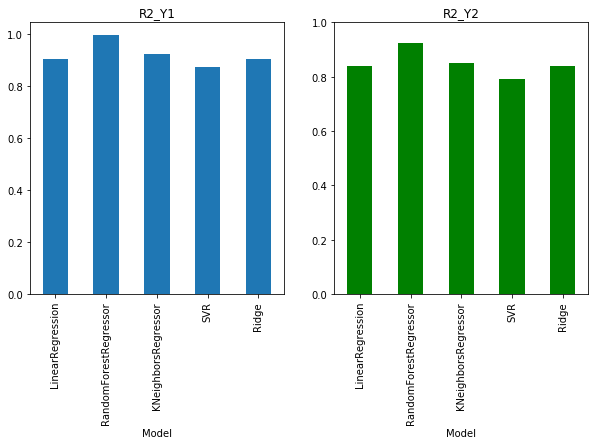

In [147]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
TestModels.R2_Y1.plot(ax=axes[0], kind='bar', title='R2_Y1', figsize=(10, 5))

TestModels.R2_Y2.plot(ax=axes[1], kind='bar', color='green', title='R2_Y2').set_ylim([0, 1])

In [145]:
model = models[1]
model.fit(Xtrn, Ytrn)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [146]:
model.feature_importances_

array([ 0.39028856,  0.10863049,  0.40833701,  0.00799927,  0.05867969,
        0.02606498])

array([ 0.39028856,0.40833701)

У нашому випадку видно, що найбільше на урожайність впливають загальна вологість і площа висіву. Їх загальний внесок в прогнозної моделі близько 72%.
Ці фактори у нас дуже тісно корелюють між собою (r = 97 %).